## Load dataset

In [ ]:
from urso import Urso 
from config import Config
import utils
import cv2

# Dataset location
dataset_path = 'data/UESAT_RGB_53/MMdata'

# Load dataset
dataset = Urso()
config = Config()
dataset.load_dataset(dataset_path, config, "train")

: 

## Load and show image and pose

[-0.7723319593412921, 10.769561981969844, -1.8684047373491224]
q is [-0.31856006  0.13192734  0.7388087   0.5790305 ]
C is [-0.7723319593412921, 10.769561981969844, -1.8684047373491224]
K is [[ 640.          640.            0.        ]
 [   0.          480.         -640.46325377]
 [   0.            1.            0.        ]]
v is [[ -3.94590303 -58.70133918 -15.67013198]
 [ 27.17200144  13.76259017 -48.60242198]
 [  0.           0.           0.        ]]
np.linalg.norm(v) 200.0


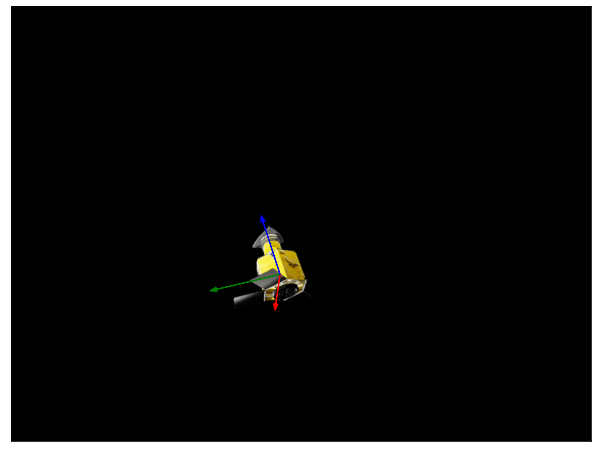

In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
# Load image and gt pose
image_id = random.choice(dataset.image_ids)
image_original = dataset.load_image(image_id)
#image_path= '/media/computer/study/CZL/code training/pose and motion tracking through optical_flow/datasets/test/gassp1_174.png'
#image_original = Image.open(image_path)
loc_gt = dataset.load_location(image_id)
q_gt = dataset.load_quaternion(image_id)
print(loc_gt)
# Retrieve K (calibration matrix)
K = dataset.camera.K
#fov_x = 90.0 * np.pi / 180
#fov_z = 73.7 * np.pi / 180
#width = 1280  # number of horizontal[pixels]
#height = 960  # number of vertical[pixels]
# Focal lengths
#fx = width / (2 * np.tan(fov_x / 2))
#fz =  -height / (2 * np.tan(fov_z / 2))
#K = np.matrix([[fx, width / 2, 0], [0, height / 2, fz], [0, 1, 0]])
# 3. Visualize original image + gt
fig, ax_1 = plt.subplots(1,1,figsize=(12, 8))
ax_1.imshow(image_original)
ax_1.set_xticks([])
ax_1.set_yticks([])
axis_length = 200
utils.visualize_axes(ax_1, q_gt, loc_gt, K, axis_length)
#visualize_axes is left handvisualize_axes1 is right hand 
plt.show()


## Data augmentation visualization

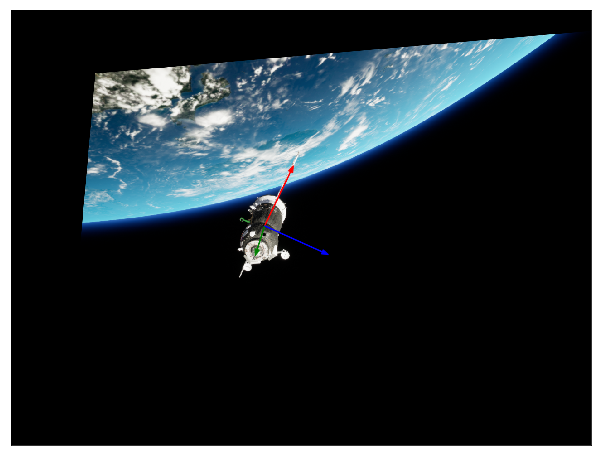

In [6]:
import cv2
import se3lib

magnitude = 20 # deg
image_warped, loc_new, q_new = utils.rotate_cam(image_original, loc_gt, q_gt, K,magnitude)
# The following does instead in-plane rotation
#image_warped, loc_new, q_new = utils.rotate_image(image_original, loc_gt, q_gt, dataset.camera.K)

fig, (ax_2) = plt.subplots(1,1,figsize=(12, 8))
ax_2.imshow(image_warped)
ax_2.set_xticks([])
ax_2.set_yticks([])

utils.visualize_axes(ax_2, q_new, loc_new, K, 200)